In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../Input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

In [59]:
uber_df=pd.read_csv("./Input/Uber.csv")

I need to understand the dataset which i need to work on it

In [60]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [61]:
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [62]:
# Remove uncessary data
uber_df = uber_df[:-1]

In [63]:
# fix data types of data columns
i=0
def convert_time(column_name):
    y=[]
    w=[]
    for x in uber_df[column_name]:
        temp = datetime.datetime.strptime(x, "%m/%d/%Y %H:%M")
        y.append(temp)
        w.append(temp.strftime("%A"))
    uber_df[column_name] = y
    global i
    if  i==0:
        uber_df["Day"]= w
        i +=1

In [64]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [65]:
# check that all data is fixed and ready to work on it
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
 7   Day          1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 72.3+ KB


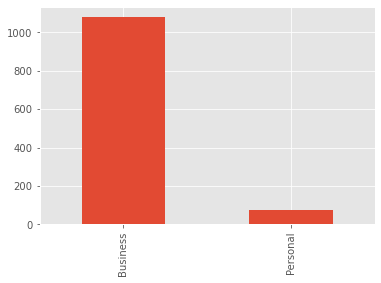

In [66]:
# plot number of trip at each category
x = uber_df['CATEGORY*'].value_counts().plot(kind='bar')

As we notice that the most trips made in business category with huge difference beteewn it and personal category.

In [67]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday


In [68]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month



In [69]:
#extract time from start date
count = 0
time=[]
while count < len(uber_df):
    time.append(uber_df['START_DATE*'][count].hour)
    count = count+1
uber_df['Time'] = time


In [70]:
# calculate duration of each trip in minutes
minutes = []

uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)
    
uber_df['Duration_Minutes'] = minutes


In [71]:
# calculate trip speed for each driver
uber_df['Duration_hours'] = uber_df['Duration_Minutes'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']


In [72]:
#remove invalid data
uber_df = uber_df.drop([751,761,798,807])

Text(0.5, 0, 'Day')

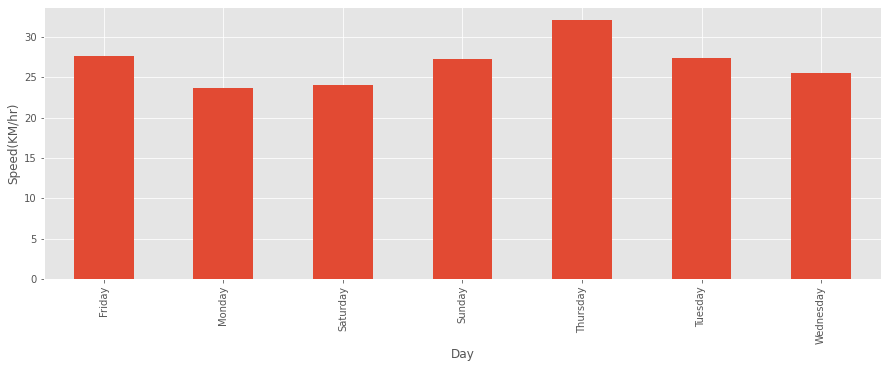

In [73]:
#Average Speed each Day of the week
purpose = uber_df.groupby('Day')['Speed_KM'].mean()
purpose.plot(kind = 'bar',figsize=(15,5))
plt.ylabel('Speed(KM/hr)')
plt.xlabel('Day')

Text(0.5, 0, 'Day')

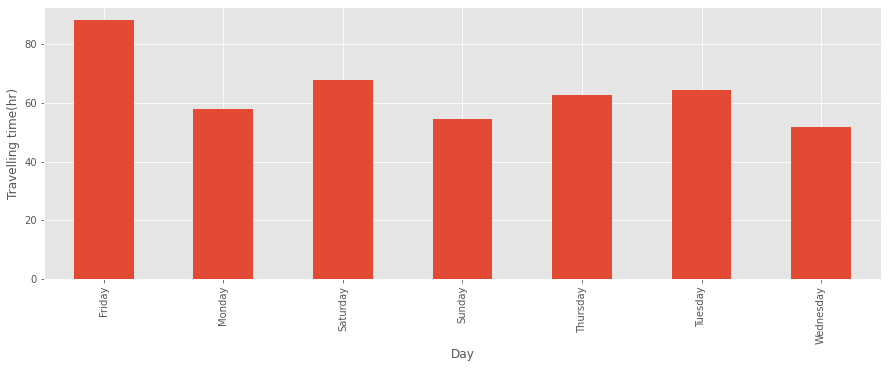

In [74]:
#Total Travelling time each Day of the week
purpose = uber_df.groupby('Day')["Duration_hours"].sum()
purpose.plot(kind = 'bar',figsize=(15,5))
plt.ylabel('Travelling time(hr)')
plt.xlabel('Day')

Text(0.5, 1.0, 'Number of trips per Day')

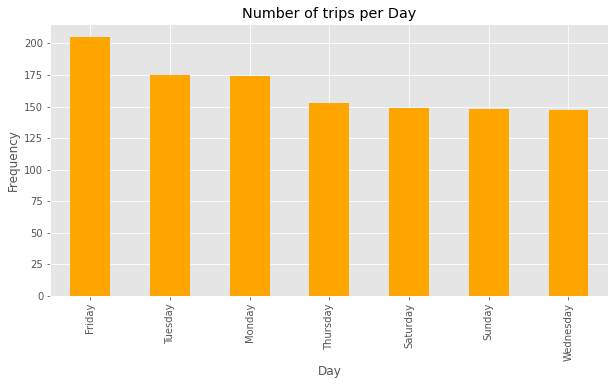

In [75]:
#Trips per day of the week
x = uber_df['Day'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of trips per Day')

Text(0.5, 0, 'Month')

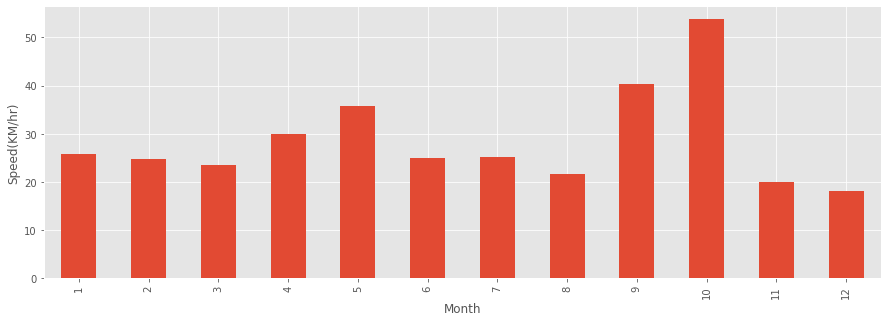

In [76]:
#Average Speed for each Month
purpose = uber_df.groupby('Month')['Speed_KM'].mean()
purpose.plot(kind = 'bar',figsize=(15,5))
plt.ylabel('Speed(KM/hr)')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

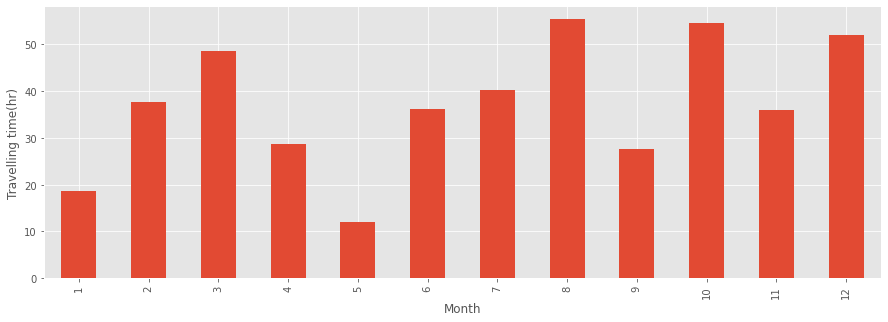

In [77]:
#Total Travelling time each Month
purpose = uber_df.groupby('Month')["Duration_hours"].sum()
purpose.plot(kind = 'bar',figsize=(15,5))
plt.ylabel('Travelling time(hr)')
plt.xlabel('Month')

Text(0.5, 1.0, 'Number of trips per Month')

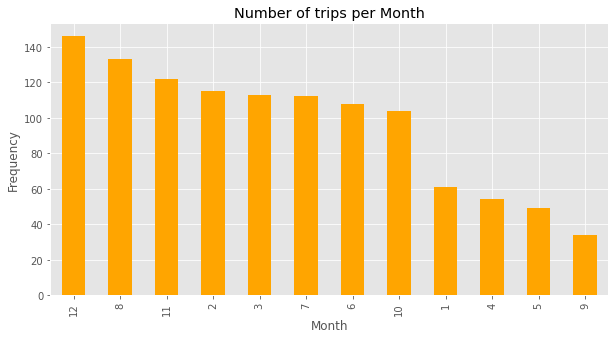

In [78]:
# Trips at each month
x = uber_df['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')
#Highest trips are made in December

Text(0, 0.5, 'Frequency')

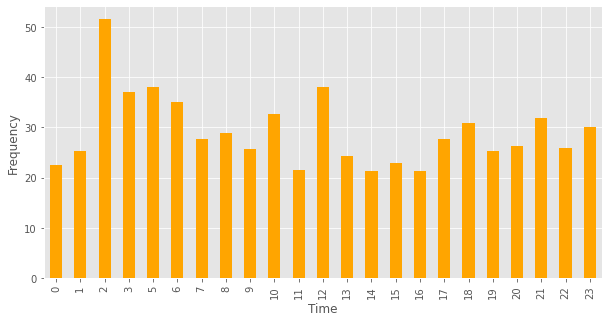

In [79]:
x = uber_df.groupby('Time')['Speed_KM'].mean()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Time')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

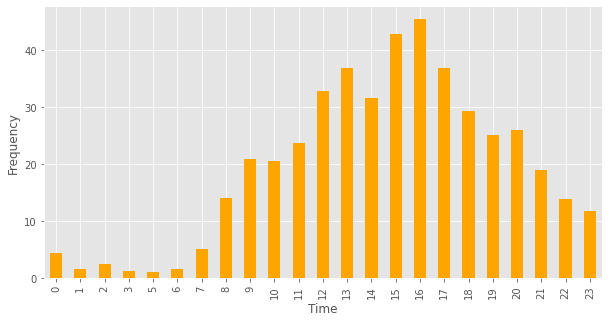

In [80]:
x = uber_df.groupby('Time')['Duration_hours'].sum()
x.plot(kind='bar',figsize=(10,5),color='orange')
plt.xlabel('Time')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Number of trips per hour')

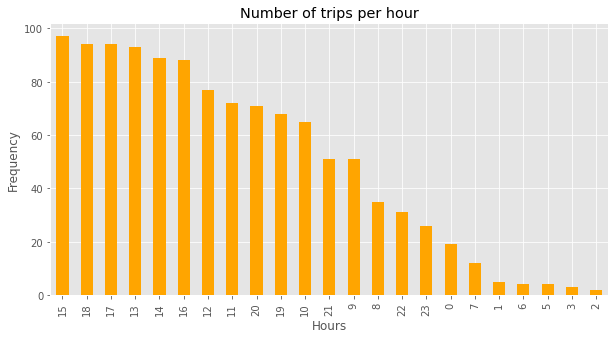

In [81]:
# I need to see how many trip made at each hour of the day and as you see the hour which has the higest number of trips is 3:00PM
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

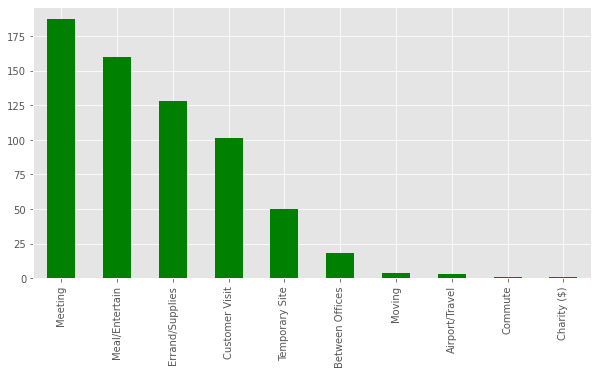

In [82]:

##extra
# see how many trips made by each purpose
purpose_time = uber_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

we need to know the speed of each drive to accomplish each trip, we need to calculate trip in hours at the first and save it into [duraion_hours] and then apply speed law, speed = distance / time

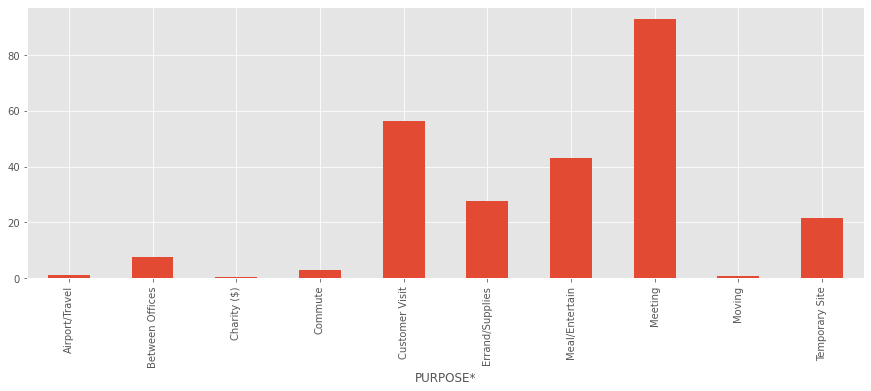

In [83]:
#Travelling time
purpose = uber_df.groupby('PURPOSE*')["Duration_hours"].sum()
purpose.plot(kind = 'bar',figsize=(15,5))

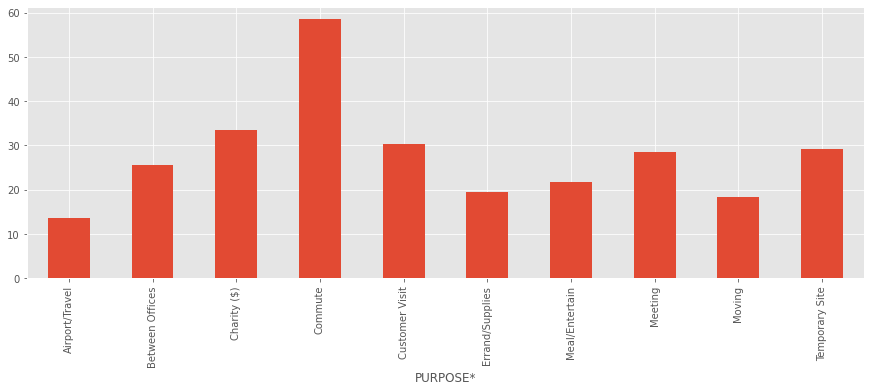

In [84]:
# average Speed 
purpose = uber_df.groupby('PURPOSE*')["Speed_KM"].mean()
purpose.plot(kind = 'bar',figsize=(15,5))

In [85]:
# calculate trip speed for each driver
uber_df['Duration_hours'] = uber_df['Duration_Minutes'] / 60
uber_df['Speed_KM'] = uber_df['MILES*'] / uber_df['Duration_hours']
uber_df['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
1154    28.077670
Name: Speed_KM, Length: 1151, dtype: float64